In [1]:
import tensorflow as tf

In [4]:
#상수항 생성
hello = tf.constant('hello, TensorFlow')
sess = tf.Session()
print(sess.run(hello))

hello, TensorFlow


In [8]:
#덧셈 노드 생성
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = node1 + node2

sess = tf.Session()
print (sess.run([node1, node2]))
print (sess.run(node3))

[3.0, 4.0]
7.0


In [10]:
#Feed Dict
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a+b

print (sess.run(adder_node, feed_dict={a:3, b:4}))

7.0


### GradientDecent를 이용한 최적화

In [13]:
#X_train = [1,2,3]; y_train = [1,2,3]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = X * W + b
cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val, _ = \
    sess.run([cost, W, b, train], feed_dict={X:[1,2,3], Y:[1,2,3]})
    if step % 20 == 0:
        print (step, cost_val, W_val, b_val)

0 2.57366 [ 0.84831876] [-1.12570524]
20 0.125373 [ 1.320364] [-0.86828363]
40 0.0938095 [ 1.34957707] [-0.80800349]
60 0.0850174 [ 1.33736336] [-0.76817596]
80 0.0772125 [ 1.32191014] [-0.73189801]
100 0.0701257 [ 1.30681968] [-0.69748473]
120 0.0636893 [ 1.29240394] [-0.66470391]
140 0.0578436 [ 1.27866232] [-0.63346499]
160 0.0525345 [ 1.26556635] [-0.6036945]
180 0.0477127 [ 1.25308561] [-0.57532305]
200 0.0433334 [ 1.24119151] [-0.54828489]
220 0.0393561 [ 1.22985625] [-0.52251744]
240 0.0357438 [ 1.21905375] [-0.49796084]
260 0.032463 [ 1.20875907] [-0.47455844]
280 0.0294835 [ 1.19894814] [-0.45225596]
300 0.0267774 [ 1.18959832] [-0.4310016]
320 0.0243196 [ 1.1806879] [-0.41074604]
340 0.0220875 [ 1.17219627] [-0.39144254]
360 0.0200602 [ 1.16410387] [-0.37304619]
380 0.018219 [ 1.15639138] [-0.35551444]
400 0.0165468 [ 1.14904141] [-0.33880648]
420 0.0150281 [ 1.14203727] [-0.32288393]
440 0.0136487 [ 1.13536203] [-0.30770963]
460 0.012396 [ 1.12900043] [-0.29324841]
480 0.011

In [14]:
print (sess.run(hypothesis, feed_dict={X:[5,6]}))

[ 5.00864124  6.01180983]


### W값에 따른 손실함수 값 변화

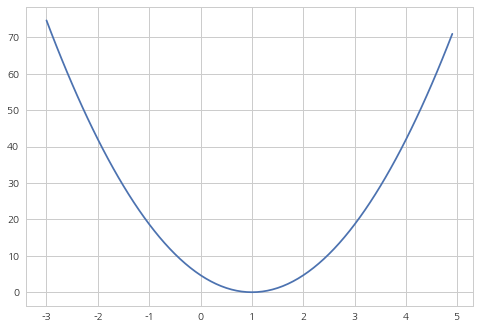

In [15]:
X = [1,2,3]; Y = [1,2,3]
W = tf.placeholder(tf.float32)
hypothesis = X*W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []; cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W:feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()

### 최적화 알고리즘 구현

In [17]:
X_data = [1,2,3]; Y_data=[1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X*W
cost = tf.reduce_sum(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W*X-Y)*X)
decent = W - learning_rate*gradient
update = W.assign(decent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X:X_data, Y:Y_data})
    print (step, sess.run(cost, feed_dict={X:X_data, Y:Y_data}), sess.run(W))

0 2.06261 [ 0.61616522]
1 0.586698 [ 0.79528809]
2 0.166883 [ 0.89082032]
3 0.0474688 [ 0.94177085]
4 0.0135023 [ 0.96894443]
5 0.00384063 [ 0.98343706]
6 0.00109245 [ 0.99116641]
7 0.000310748 [ 0.99528873]
8 8.83908e-05 [ 0.99748731]
9 2.51413e-05 [ 0.99865991]
10 7.15128e-06 [ 0.99928528]
11 2.03395e-06 [ 0.99961883]
12 5.78625e-07 [ 0.99979669]
13 1.64532e-07 [ 0.99989158]
14 4.68398e-08 [ 0.99994218]
15 1.33054e-08 [ 0.99996918]
16 3.78884e-09 [ 0.99998355]
17 1.07166e-09 [ 0.99999124]
18 2.99295e-10 [ 0.99999535]
19 8.95426e-11 [ 0.9999975]
20 2.31495e-11 [ 0.99999869]


### 다항회귀

In [21]:
x1_data = [73.,93.,89.,96.,73.]; x2_data = [80.,88.,91.,98.,66.]; x3_data=[75.,93.,90.,100.,70.]
y_data=[152.,185.,180.,196.,142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1*w1 + x2*w2 + x3*w3 + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost,hypothesis, train],
                        feed_dict={x1:x1_data, x2:x2_data, x3:x3_data, Y:y_data})
    if step%20 == 0:
        print(step, "Cost: ",cost_val, "\nPrediction:\n", hy_val)

0 Cost:  98889.3 
Prediction:
 [-133.71398926 -146.32542419 -151.48448181 -165.98878479 -107.237854  ]
20 Cost:  21.733 
Prediction:
 [ 145.31494141  188.9788208   178.93170166  193.82263184  148.50091553]
40 Cost:  21.5029 
Prediction:
 [ 145.3531189   188.95736694  178.9455719   193.83421326  148.47073364]
60 Cost:  21.2752 
Prediction:
 [ 145.38858032  188.93304443  178.95637512  193.84251404  148.43836975]
80 Cost:  21.05 
Prediction:
 [ 145.42385864  188.90881348  178.96713257  193.85076904  148.40621948]
100 Cost:  20.8273 
Prediction:
 [ 145.4589386   188.88475037  178.97784424  193.85896301  148.3742218 ]
120 Cost:  20.6069 
Prediction:
 [ 145.49382019  188.86079407  178.9884491   193.86711121  148.34239197]
140 Cost:  20.3889 
Prediction:
 [ 145.52850342  188.83695984  178.99900818  193.87521362  148.31071472]
160 Cost:  20.1732 
Prediction:
 [ 145.56300354  188.81324768  179.00950623  193.88328552  148.27920532]
180 Cost:  19.9598 
Prediction:
 [ 145.59732056  188.78968811  1

### 행렬을 사용한 다항회귀

In [3]:
x1_data = [73.,93.,89.,96.,73.]; x2_data = [80.,88.,91.,98.,66.]; x3_data=[75.,93.,90.,100.,70.]
x_data = zip(x1_data, x2_data, x3_data)
y_data=np.array([152.,185.,180.,196.,142.])

x_data = [list(i) for i in x_data]
y_data = y_data[:,np.newaxis]

X = tf.placeholder(tf.float32, shape=[None,3])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='weight')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

'''for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={X:x_data, Y:y_data})
    if step%20 == 0:
        print (step, "Cost: ",cost_val, "\nPrediction\n:", hy_val)'''

'for step in range(2001):\n    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],\n                        feed_dict={X:x_data, Y:y_data})\n    if step%20 == 0:\n        print (step, "Cost: ",cost_val, "\nPrediction\n:", hy_val)'

### 배치 단위로 파일을 읽어오기

In [3]:
filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)
record_defaults=[[0.],[0.],[0.],[0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

train_x_batch, train_y_batch=\
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

X=tf.placeholder(tf.float32, shape=[None, 3])
Y=tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X:x_batch,Y:y_batch})
    if step%20 ==0:
        print(step, 'Cost: ',cost_val,'\nPrediction:\n',hy_val)
coord.request.stop()
coord.join(threads)

0 Cost:  51.3228 
Prediction:
 [[ 143.84683228]
 [ 180.25315857]
 [ 173.76638794]
 [ 189.35366821]
 [ 139.29452515]
 [ 103.88547516]
 [ 139.95726013]
 [ 101.01110077]
 [ 170.3841095 ]
 [ 158.82528687]]
20 Cost:  19.4212 
Prediction:
 [[ 150.804245  ]
 [ 188.58354187]
 [ 181.99032593]
 [ 198.31637573]
 [ 145.63476562]
 [ 108.56574249]
 [ 146.68429565]
 [ 106.02444458]
 [ 178.16964722]
 [ 166.04745483]]
40 Cost:  19.2689 
Prediction:
 [[ 150.81733704]
 [ 188.56629944]
 [ 181.98985291]
 [ 198.32176208]
 [ 145.60856628]
 [ 108.55166626]
 [ 146.7063446 ]
 [ 106.06697083]
 [ 178.15310669]
 [ 166.04222107]]
60 Cost:  19.1173 
Prediction:
 [[ 150.83004761]
 [ 188.54876709]
 [ 181.98901367]
 [ 198.32670593]
 [ 145.58218384]
 [ 108.53744507]
 [ 146.72799683]
 [ 106.10905457]
 [ 178.13627625]
 [ 166.03666687]]
80 Cost:  18.9671 
Prediction:
 [[ 150.84272766]
 [ 188.53132629]
 [ 181.98817444]
 [ 198.33161926]
 [ 145.55595398]
 [ 108.52327728]
 [ 146.74952698]
 [ 106.15093994]
 [ 178.11952209]
 [ 1

AttributeError: 'Coordinator' object has no attribute 'request'

### 로지스틱 회귀분석

In [4]:
X_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.div(1., 1.+tf.exp(-(tf.matmul(X,W)+b)))
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X:X_data, Y:y_data})
        if step%20 ==0:
            print (step,cost_val)
    
    h,c,a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:X_data, Y:y_data})
    print ('\nHypothesis: ', h, '\nPredicted (Y): ', c, '\nAccuracy: ', a)

0 6.0706
20 4.42305
40 2.80961
60 1.40735
80 0.740663
100 0.597842
120 0.568736
140 0.560687
160 0.557043
180 0.554421
200 0.552063
220 0.54979
240 0.547555
260 0.545346
280 0.54316
300 0.540996
320 0.538851
340 0.536727
360 0.53462
380 0.532532
400 0.530461
420 0.528406
440 0.526368
460 0.524345
480 0.522337
500 0.520344
520 0.518366
540 0.516401
560 0.514449
580 0.512511
600 0.510586
620 0.508673
640 0.506772
660 0.504883
680 0.503006
700 0.50114
720 0.499285
740 0.497442
760 0.495609
780 0.493787
800 0.491975
820 0.490173
840 0.488382
860 0.4866
880 0.484828
900 0.483066
920 0.481314
940 0.479571
960 0.477837
980 0.476112
1000 0.474397
1020 0.47269
1040 0.470992
1060 0.469303
1080 0.467623
1100 0.465952
1120 0.464289
1140 0.462634
1160 0.460988
1180 0.459351
1200 0.457721
1220 0.4561
1240 0.454487
1260 0.452882
1280 0.451285
1300 0.449696
1320 0.448115
1340 0.446542
1360 0.444976
1380 0.443419
1400 0.441869
1420 0.440327
1440 0.438792
1460 0.437265
1480 0.435746
1500 0.434234
1520 0

### 클래스가 3개 이상인 분류문제(softmax)

In [71]:
X_data = [[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,5,6],
          [1,6,6,6],[1,7,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

X = tf.placeholder('float', [None,4])
Y = tf.placeholder('float', [None,3])
nb_classes=3

W = tf.Variable(tf.random_normal([4,nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

linear = tf.matmul(X,W)+b
logit = tf.div(1., 1.+tf.exp(-linear))
softmax = tf.div(tf.exp(logit), tf.reduce_sum(tf.exp(logit),1, keep_dims=True))
#softmax = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(softmax),1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(optimizer, feed_dict={X:X_data, Y:y_data})
        if step%20==0:
            print (step, sess.run(cost,feed_dict={X:X_data, Y:y_data}))

    a = sess.run(softmax, feed_dict={X:[[1,11,7,9]]})
    print (a)


0 1.10347
20 1.09854
40 1.09553
60 1.09312
80 1.09118
100 1.08959
120 1.08825
140 1.08711
160 1.08612
180 1.08526
200 1.08449
220 1.0838
240 1.08318
260 1.08261
280 1.08208
300 1.0816
320 1.08114
340 1.08072
360 1.08031
380 1.07993
400 1.07957
420 1.07922
440 1.07888
460 1.07856
480 1.07824
500 1.07794
520 1.07764
540 1.07735
560 1.07706
580 1.07677
600 1.07649
620 1.07622
640 1.07594
660 1.07567
680 1.0754
700 1.07513
720 1.07486
740 1.07459
760 1.07432
780 1.07405
800 1.07378
820 1.07351
840 1.07324
860 1.07297
880 1.0727
900 1.07243
920 1.07216
940 1.07189
960 1.07162
980 1.07135
1000 1.07108
1020 1.07081
1040 1.07055
1060 1.07028
1080 1.07002
1100 1.06976
1120 1.0695
1140 1.06924
1160 1.06899
1180 1.06873
1200 1.06848
1220 1.06823
1240 1.06799
1260 1.06775
1280 1.0675
1300 1.06727
1320 1.06703
1340 1.0668
1360 1.06657
1380 1.06634
1400 1.06612
1420 1.0659
1440 1.06568
1460 1.06547
1480 1.06525
1500 1.06505
1520 1.06484
1540 1.06464
1560 1.06444
1580 1.06424
1600 1.06405
1620 1.0638

### softmax-cross-entropy

In [5]:
filename_queue = tf.train.string_input_producer(['data-04-zoo.csv'], shuffle=False, name='filename_queue')
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)
record_defaults=[[0.]]*17
xy = tf.decode_csv(value, record_defaults=record_defaults)

train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)
nb_classes=7

X=tf.placeholder(tf.float32, shape=[None,16])
Y=tf.placeholder(tf.int32, shape=[None,1])

Y_one_hot = tf.one_hot(Y,nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1,nb_classes])

W=tf.Variable(tf.random_normal([16,nb_classes]), name='weight')
b=tf.Variable(tf.random_normal([nb_classes]), name='bias')

logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    for step in range(10001):
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
        sess.run(optimizer, feed_dict={X:x_batch, Y:y_batch})
        if step%100 == 0:
            loss, acc = sess.run([cost, accuracy],feed_dict={X:x_batch, Y:y_batch})
            print ("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step,loss,acc))
coord.request_stop()
coord.join(threads)

Step:     0	Loss: 9.102	Acc: 0.00%
Step:   100	Loss: 0.609	Acc: 90.00%
Step:   200	Loss: 0.661	Acc: 80.00%
Step:   300	Loss: 0.867	Acc: 70.00%
Step:   400	Loss: 0.316	Acc: 90.00%
Step:   500	Loss: 0.197	Acc: 90.00%
Step:   600	Loss: 0.061	Acc: 100.00%
Step:   700	Loss: 0.040	Acc: 100.00%
Step:   800	Loss: 0.107	Acc: 100.00%
Step:   900	Loss: 0.065	Acc: 100.00%
Step:  1000	Loss: 0.025	Acc: 100.00%
Step:  1100	Loss: 0.089	Acc: 100.00%
Step:  1200	Loss: 0.167	Acc: 100.00%
Step:  1300	Loss: 0.204	Acc: 100.00%
Step:  1400	Loss: 0.050	Acc: 100.00%
Step:  1500	Loss: 0.088	Acc: 100.00%
Step:  1600	Loss: 0.023	Acc: 100.00%
Step:  1700	Loss: 0.022	Acc: 100.00%
Step:  1800	Loss: 0.046	Acc: 100.00%
Step:  1900	Loss: 0.030	Acc: 100.00%
Step:  2000	Loss: 0.010	Acc: 100.00%
Step:  2100	Loss: 0.045	Acc: 100.00%
Step:  2200	Loss: 0.101	Acc: 100.00%
Step:  2300	Loss: 0.086	Acc: 100.00%
Step:  2400	Loss: 0.045	Acc: 100.00%
Step:  2500	Loss: 0.028	Acc: 100.00%
Step:  2600	Loss: 0.047	Acc: 100.00%
Step:  2

### MNIST using logistic regression

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes=10

X=tf.placeholder(tf.float32, [None, 784])
Y=tf.placeholder(tf.float32, [None, nb_classes])

W=tf.Variable(tf.random_normal([784,nb_classes]), name='weight')
b=tf.Variable(tf.random_normal([nb_classes]), name='weight')

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
        
        print ('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
    
    print ("Accuracy: ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

### solving XOR using Neural Network

In [21]:
x_data=[[0,0],[0,1],[1,0],[1,1]]
y_data=[[0],[1],[1],[0]]

X=tf.placeholder(tf.float32, [None,2])
Y=tf.placeholder(tf.float32, [None,1])

'''
#two layers
W1=tf.Variable(tf.random_uniform([2,2], -1.0, 1.0))
W2=tf.Variable(tf.random_uniform([2,1], -1.0, 1.0))
b1=tf.Variable(tf.zeros([2]), name='bias1')
b2=tf.Variable(tf.zeros([1]), name='bias2')

# wide NN
W1=tf.Variable(tf.random_uniform([2,10], -1.0, 1.0))
W2=tf.Variable(tf.random_uniform([10,1], -1.0, 1.0))
b1=tf.Variable(tf.zeros([10]), name='bias1')
b2=tf.Variable(tf.zeros([1]), name='bias2')
'''
#deep NN
W1=tf.Variable(tf.random_uniform([2,5], -1.0, 1.0))
W2=tf.Variable(tf.random_uniform([5,4], -1.0, 1.0))
W3=tf.Variable(tf.random_uniform([4,1], -1.0, 1.0))
b1=tf.Variable(tf.zeros([5]), name='bias1')
b2=tf.Variable(tf.zeros([4]), name='bias2')
b3=tf.Variable(tf.zeros([1]), name='bias3')

'''L2=tf.sigmoid(tf.matmul(X,W1)+b1)
hypothesis = tf.sigmoid(tf.matmul(L2,W2)+b2)
'''
L2=tf.sigmoid(tf.matmul(X,W1)+b1)
L3=tf.sigmoid(tf.matmul(L2,W2)+b2)
hypothesis = tf.sigmoid(tf.matmul(L3,W3)+b3)

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

a=tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in xrange(100001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step%1000==0:
            print (step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W1))
        
    correct_prediction=tf.equal(tf.floor(hypothesis+0.5), Y)
    accuracy=tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print (sess.run([hypothesis, tf.floor(hypothesis+0.5), correct_prediction], feed_dict={X:x_data, Y:y_data}))
    print ('Accuracy:', accuracy.eval({X:x_data, Y:y_data}))

0 0.728957 [[ 0.70837927  0.79463416  0.54132283 -0.71077824 -0.45960951]
 [ 0.21429512  0.74477041  0.38027644  0.6988312  -0.08455852]]
1000 0.691885 [[ 0.68345296  0.87678176  0.50647205 -0.66455334 -0.47320586]
 [ 0.15238281  0.83145952  0.3380793   0.80737108 -0.12005953]]
2000 0.689005 [[ 0.67537409  1.05311847  0.48264721 -0.68307573 -0.47984311]
 [ 0.11045633  1.0193249   0.30390185  1.00392044 -0.15055659]]
3000 0.67422 [[ 0.68622357  1.47936797  0.47764415 -0.85962862 -0.47568229]
 [ 0.07493007  1.48788834  0.26636669  1.38369858 -0.18629129]]
4000 0.538137 [[ 0.91054517  2.56318712  0.72121447 -1.52263665 -0.38303977]
 [ 0.0101263   2.83775234  0.19809364  2.45912004 -0.22089463]]
5000 0.105471 [[  2.47560573e+00   3.82468271e+00   2.16604543e+00  -2.73406839e+00
   -5.97262323e-01]
 [ -3.31407487e-01   4.33776617e+00  -2.84618023e-03   4.15886593e+00
   -1.83010757e-01]]
6000 0.0281572 [[ 3.02417994  4.27568007  2.58113813 -3.22834039 -0.77402002]
 [-0.48822713  4.69760513 

### Tensorboard

In [2]:
x_data=[[0,0],[0,1],[1,0],[1,1]]
y_data=[[0],[1],[1],[0]]
x_data=np.array(x_data, dtype=np.float32)
y_data=np.array(y_data, dtype=np.float32)

X=tf.placeholder(tf.float32, [None,2], name='X_input')
Y=tf.placeholder(tf.float32, [None,1], name='Y_input')

#deep NN
W1=tf.Variable(tf.random_uniform([2,5], -1.0, 1.0), name='weight1')
W2=tf.Variable(tf.random_uniform([5,4], -1.0, 1.0), name='weight2')
W3=tf.Variable(tf.random_uniform([4,1], -1.0, 1.0), name='weight3')
b1=tf.Variable(tf.zeros([5]), name='bias1')
b2=tf.Variable(tf.zeros([4]), name='bias2')
b3=tf.Variable(tf.zeros([1]), name='bias3')

with tf.name_scope("layer2") as scope:
    L2=tf.sigmoid(tf.matmul(X,W1)+b1)

with tf.name_scope("layer3") as scope:
    L3=tf.sigmoid(tf.matmul(L2,W2)+b2)

with tf.name_scope("layer4") as scope:    
    hypothesis = tf.sigmoid(tf.matmul(L3,W3)+b3)

with tf.name_scope("costs") as scope:
    cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:    
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    train = optimizer.minimize(cost)
    
w1_hist=tf.summary.histogram("weights1", W1)
w2_hist=tf.summary.histogram("weights2", W2)
w3_hist=tf.summary.histogram("weights3", W3)
b1_hist=tf.summary.histogram("biases1", b1)
b2_hist=tf.summary.histogram("biases2", b2)
b3_hist=tf.summary.histogram("biases3", b3)
y_hist = tf.summary.histogram("y", Y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("../logs", sess.graph)
    
    for step in xrange(100001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step%1000 ==0:
            summary, _= sess.run([merged,train], feed_dict={X:x_data, Y:y_data})
            writer.add_summary(summary, step)

## MNIST with RELU

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes=10
keep_prob=tf.placeholder(tf.float32)

X=tf.placeholder(tf.float32, [None, 784])
Y=tf.placeholder(tf.float32, [None, nb_classes])

#Layer1
W1=tf.get_variable("W1", shape=[784,512], initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([512]), name='bias1')
L1=tf.nn.relu(tf.matmul(X, W1)+b1)
L1=tf.nn.dropout(L1, keep_prob=keep_prob)

#Layer2
W2=tf.get_variable("W2", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([512]))
L2=tf.nn.relu(tf.matmul(L1,W2)+b2)
L2=tf.nn.dropout(L2, keep_prob=keep_prob)

W3=tf.get_variable("W2", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([512]))
L3=tf.nn.relu(tf.matmul(L2,W3)+b3)
L3=tf.nn.dropout(L3, keep_prob=keep_prob)

W4=tf.get_variable("W2", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([512]))
L4=tf.nn.relu(tf.matmul(L3,W4)+b4)
L4=tf.nn.dropout(L4, keep_prob=keep_prob)

#Layer3
W5=tf.get_variable("W3", shape=[512,10], initializer=tf.contrib.layers.xavier_initializer())
b5=tf.Variable(tf.random_normal([10]))
logits=tf.matmul(L4,W5)+b5
hypothesis=tf.nn.softmax(logits)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.05).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
        
        print ('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
    
    print ("Accuracy: ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.708066634
Epoch: 0002 cost = 0.373515352
Epoch: 0003 cost = 0.358323813
Epoch: 0004 cost = 0.355370102
Epoch: 0005 cost = 0.354675549
Epoch: 0006 cost = 0.351218239
Epoch: 0007 cost = 0.331291266
Epoch: 0008 cost = 0.317240680
Epoch: 0009 cost = 0.326883071
Epoch: 0010 cost = 0.325672709
Epoch: 0011 cost = 0.331709048
Epoch: 0012 cost = 0.376545494
Epoch: 0013 cost = 0.333683162
Epoch: 0014 cost = 0.316968780
Epoch: 0015 cost = 0.326600642
Accuracy:  0.9134
